$F_\beta$ 스코어는 precision (정밀도)과 recall (재현율) 사이의 균형을 평가하기 위한 지표로, 다음과 같이 정의됩니다:


$$\[ F_\beta = \left(1 + \beta^2\right) \cdot \frac{{\text{precision} \cdot \text{recall}}}{{\left(\beta^2 \cdot \text{precision} + \text{recall}\right)}} \]$$

여기서:
- precision은 $\(\text{TP} / (\text{TP} + \text{FP})\)$로 정의됩니다.
- recall은 \(\text{TP} / (\text{TP} + \text{FN})\)로 정의됩니다.
- TP는 True Positive, FP는 False Positive, FN은 False Negative를 의미합니다.

(https://en.wikipedia.org/wiki/F-score)

### F_\beta 점수가 최대가 되는 상황
F_\beta 점수가 최대가 되려면 precision과 recall이 모두 높아야 합니다. 특히, precision과 recall이 모두 1에 가까울 때 F_\beta 점수도 최대가 됩니다. 이 경우, 분자와 분모가 동일하게 되어 F_\beta 점수가 최대인 1에 도달합니다.



### 그래프
아래는 precision과 recall의 값이 변화할 때 F1 (F_β에서 β=1 시)의 변화를 나타낸 그래프입니다. 각 축은 precision과 recall을 나타내며, z축은 F1 점수를 나타냅니다.



/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_21312/924997604.py:5: RuntimeWarning: invalid value encountered in true_divide
  return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)


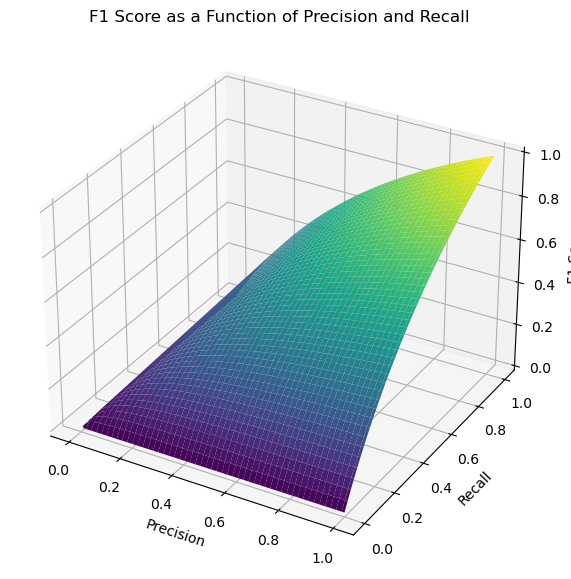

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f_beta(precision, recall, beta=1):
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

precision = np.linspace(0, 1, 100)
recall = np.linspace(0, 1, 100)

precision, recall = np.meshgrid(precision, recall)
f1_scores = f_beta(precision, recall, beta=1)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(precision, recall, f1_scores, cmap='viridis')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_zlabel('F1 Score')
ax.set_title('F1 Score as a Function of Precision and Recall')

plt.show()

/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_21312/2230927991.py:5: RuntimeWarning: invalid value encountered in true_divide
  return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)


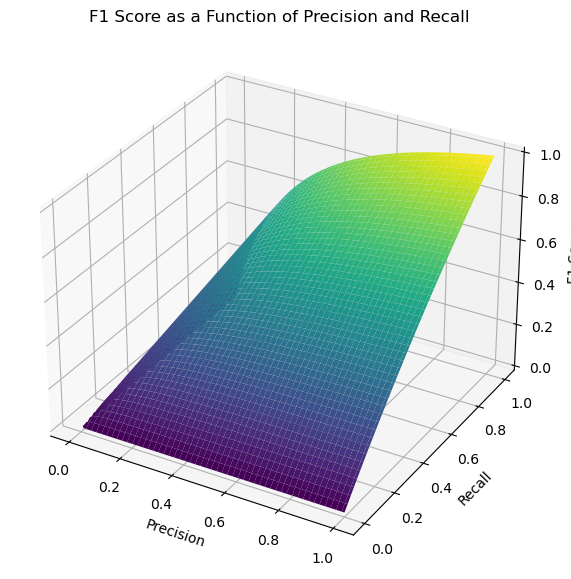

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f_beta(precision, recall, beta=1):
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

precision = np.linspace(0, 1, 100)
recall = np.linspace(0, 1, 100)

precision, recall = np.meshgrid(precision, recall)
f2_scores = f_beta(precision, recall, beta=2)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(precision, recall, f2_scores, cmap='viridis')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_zlabel('F1 Score')
ax.set_title('F1 Score as a Function of Precision and Recall')

plt.show()

### FN과 FP의 변화에 따른 F_\beta 점수
FN과 FP의 변화에 따라 precision, recall, 그리고 F_\beta 점수가 어떻게 변하는지 살펴보겠습니다:

- **Precision** 
    - $\(\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}\)$
  - FP가 증가하면 precision이 감소하며, FP가 감소하면 precision이 증가합니다.
  - FN는 precision 계산에 직접적인 영향을 미치지 않습니다.


- **Recall** 
    - $\(\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}\)$
  - FN가 증가하면 recall이 감소하며, FN가 감소하면 recall이 증가합니다.
  - FP는 recall 계산에 직접적인 영향을 미치지 않습니다.

- **F_\beta score**
  - FN와 FP가 동시에 증가하면, precision과 recall이 모두 감소하여 F_\beta 점수도 감소합니다.
  - FN와 FP가 동시에 감소하면, precision과 recall이 모두 증가하여 F_\beta 점수도 증가합니다.

  - 단일하게 FN 또는 FP가 변할 경우, 해당 지표 (precision 또는 recall)에 직간접적인 영향을 주어 F_\beta 점수가 변동합니다.

이와 같은 배경에 따라, F_\beta 점수가 최대가 되는 상황은 FN과 FP가 모두 최소화되어 TP가 전체 True 경우와 거의 일치할 때입니다.

/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_21312/1321111630.py:5: RuntimeWarning: invalid value encountered in true_divide
  return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)


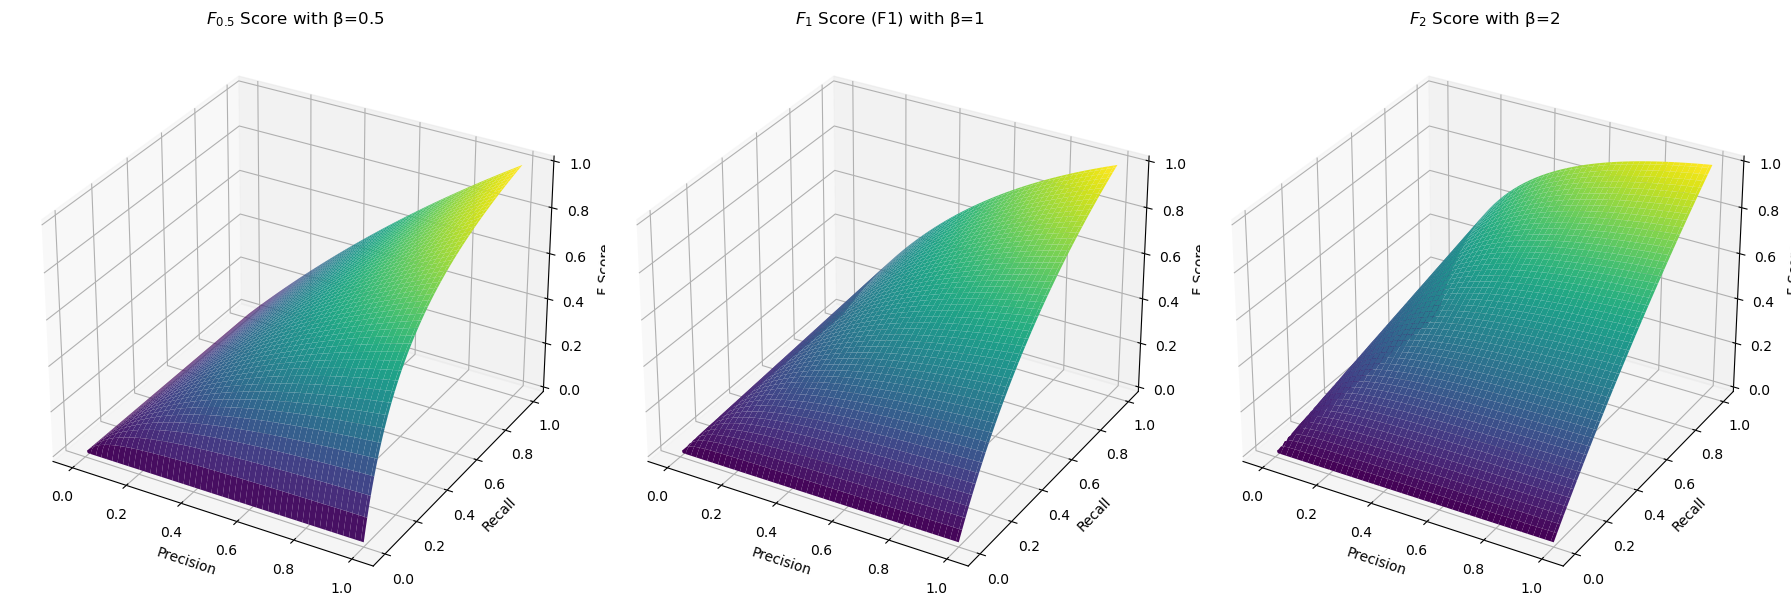

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def f_beta(precision, recall, beta):
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
precision = np.linspace(0, 1, 100)
recall = np.linspace(0, 1, 100)
precision, recall = np.meshgrid(precision, recall)

# Different beta values
beta_vals = [0.5, 1, 2]
titles = [r'$F_{0.5}$ Score', r'$F_{1}$ Score (F1)', r'$F_{2}$ Score']
fig = plt.figure(figsize=(18, 6))

for i, beta in enumerate(beta_vals):
    f_scores = f_beta(precision, recall, beta)
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.plot_surface(precision, recall, f_scores, cmap='viridis')
    ax.set_xlabel('Precision')
    ax.set_ylabel('Recall')
    ax.set_zlabel('F Score')
    ax.set_title(f'{titles[i]} with β={beta}')

plt.tight_layout()
plt.show()

1. **\[F_{0.5}\] Score**: β 값이 0.5일 때는 precision을 더 중시합니다. recall이 낮아도 precision이 높으면 F 점수가 높게 유지됩니다.
2. **\[F_1\] Score**: F1 점수는 precision과 recall이 동등하게 고려되며, 두 값이 비슷할 때 최대값에 도달합니다.
3. **\[F_2\] Score**: β 값이 2일 때는 recall을 더 중시합니다. precision이 낮아도 recall이 높으면 F 점수가 높게 유지됩니다.